### import necessary libraries

* cv2 ( [pypi.org](https://pypi.org/project/opencv-python) )
```
pip install opencv-python
```

* matplotlib ( [pypi.org](https://pypi.org/project/matplotlib), [matplotlib.org](https://matplotlib.org/stable/users/installing.html) )
```
pip install matplotlib
```

* PIL ( [pypi.org](https://pypi.org/project/Pillow), [pillow.readthedocs.io](https://pillow.readthedocs.io/en/stable/installation.html) )
```
pip install Pillow
```

* numpy ( [pypi.org](https://pypi.org/project/numpy), [numpy.org](https://numpy.org/install) )
```
pip install numpy
```

* skimage ( [pypi.org](https://pypi.org/project/scikit-image), [scikit-image.org](https://scikit-image.org/docs/dev/install.html) )
```
pip install -U scikit-image
```

* scipy ( [pypi.org](https://pypi.org/project/scipy), [scipy.org](https://scipy.org/install) )
```
pip install scipy
```
---
### Install all packages
```bash
python -m pip install -U --user numpy scipy matplotlib ipython jupyter pandas sympy nose opencv-python Pillow scikit-image
```

In [1]:
import cv2  

import matplotlib.image as mpimg
import matplotlib.pyplot as plt  
import matplotlib.colors as colors
import matplotlib.cbook as cbook
from matplotlib import cm

from PIL import Image  

import numpy as np  

from skimage.io import imshow, imread
from skimage.color import rgb2gray
from skimage import img_as_ubyte, img_as_float
from skimage.exposure import histogram, cumulative_distribution
from skimage.metrics import mean_squared_error as sk_mse
from skimage.metrics import peak_signal_noise_ratio as sk_psnr

#import scipy
from scipy import signal
from scipy.stats import lognorm
from scipy.fftpack import fft, dct, ifft, idct
import itertools
from math import log10, sqrt

### function for show image 

In [2]:
def ShowImage(img, title="no title", subplot=111):
    if type(subplot)!=tuple :
        plt.subplot(subplot)
    else :
        plt.subplot(*subplot)
    plt.imshow( img, cmap='gray', vmin=0, vmax=255 )
    plt.title( title, fontweight ="bold")

### read image in 2D array

In [3]:
image = cv2.imread('pic1.PNG', cv2.IMREAD_GRAYSCALE)

In [4]:
image.shape

(360, 372)

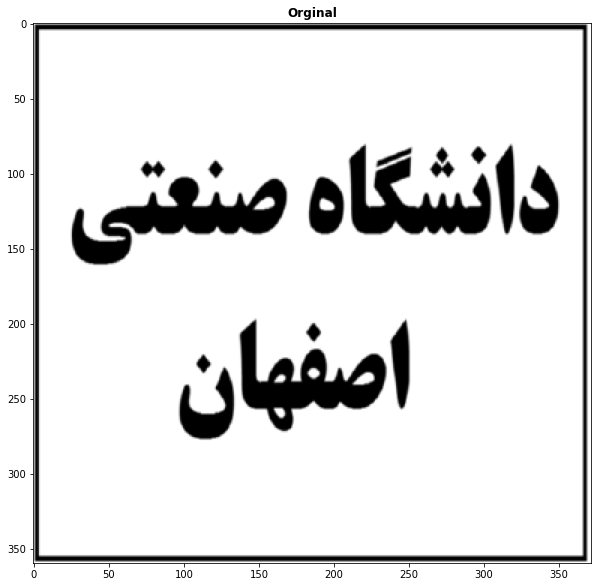

In [5]:
plt.figure(figsize=[10, 10])
ShowImage(image, "Orginal")

## Q1

In [6]:
def AddImage(img1, img2, avg=False):
    img1F = img1.astype('float')
    img2F = img2.astype('float')
    additionF = (img1F+img2F)
    if avg:
        additionF = additionF/2
    else :
        additionF[additionF > 255] = 255
    return additionF.astype('uint8')

In [7]:
def HW4_Shadow(I, s, d):
    sigma = d  # Standard deviation
    ksize = np.int64(np.ceil(sigma)*6+1)
    
    # method 1
    fil = cv2.getGaussianKernel(ksize, sigma) # 1D kernel
    fil = fil*np.transpose(fil) # cv2.mulTransposed(fil, False)  # 2D kernel by outer product
    blur = cv2.filter2D(image, -1, fil)
    
    # method 2
    blur2 = cv2.GaussianBlur(I,(ksize,ksize),sigma)
    
    
    Shadow = np.pad(blur2, ((s, 0), (s, 0)), mode='constant', constant_values=255)[:I.shape[0],:I.shape[1]]
    #result = AddImage(image, Shadow, avg=False)
    result = np.minimum(image, Shadow)
    
    plt.figure(figsize=[20, 20])
    ShowImage(image , "Orginal Image"    ,121)
    ShowImage(result, "Image with Shadow",122)

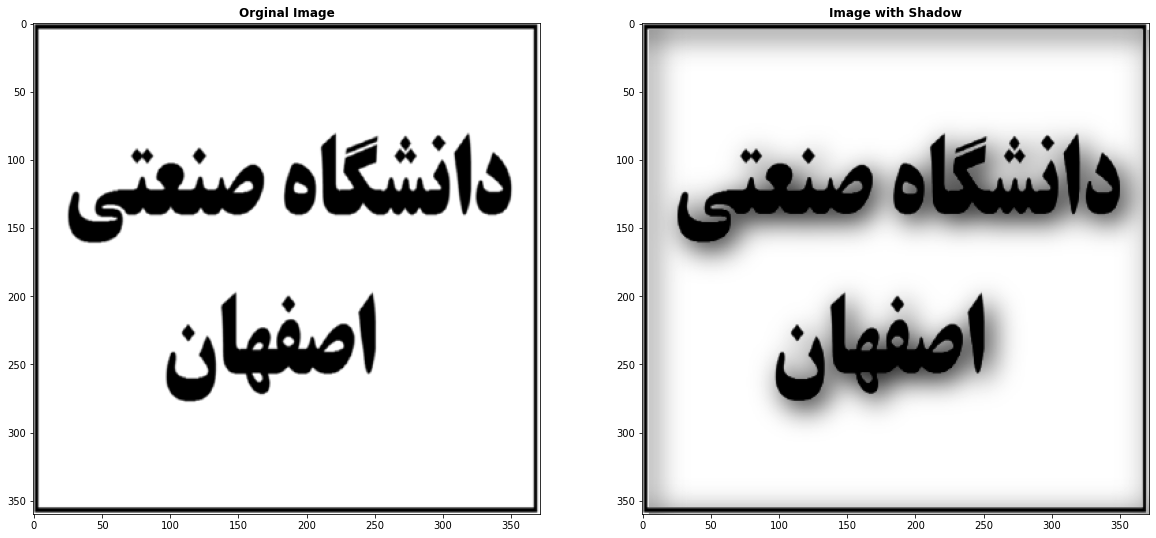

In [8]:
HW4_Shadow(image, 5, 10)

## Q2

#### Overview

The goal of this project is to write an image filtering function and use it to create hybrid images using a simplified version of the [SIGGRAPH 2006 paper](http://cvcl.mit.edu/publications/OlivaTorralb_Hybrid_Siggraph06.pdf) by Oliva, Torralba, and Schyns.  

Hybrid images are static images that change in interpretation as a function of the viewing distance. The basic idea is that high frequency tends to dominate perception when it is available, but, at a distance, only the low frequency (smooth) part of the signal can be seen. By blending the high-frequency portion of one image with the low-frequency portion of another, we get a hybrid image that leads to different interpretations at different distances. 

In [9]:
def HW4_hybrid(I, J, m, n):
    assert I.shape == J.shape , "shape shoule equal"
    
    sigma1 = m  # Standard deviation
    ksize1 = np.int64(np.ceil(sigma1)*6+1)
    blur1 = cv2.GaussianBlur(I, (ksize1,ksize1), sigma1)   # low-spatial frequencies (smooth) => looks from a long distance 
    
    sigma2 = n  # Standard deviation
    ksize2 = np.int64(np.ceil(sigma2)*6+1)
    blur2 = cv2.GaussianBlur(J,(ksize2,ksize2),sigma2)
    res2 = cv2.subtract(J, blur2)                         # high-spatial frequencies => looks from a short distance 
    
    res = cv2.add(blur1, res2)

#     res = (blur1.astype('float') + (J.astype('float') - blur2.astype('float')) )
#     res[res<0] = 0
#     res[res>255] = 255
#     res = res.astype('uint8')
    
    plt.figure(figsize=[20, 20])
    ShowImage(I, "Image 1", 131)
    ShowImage(J, "Image 2", 132)
    ShowImage(res, "result",133)

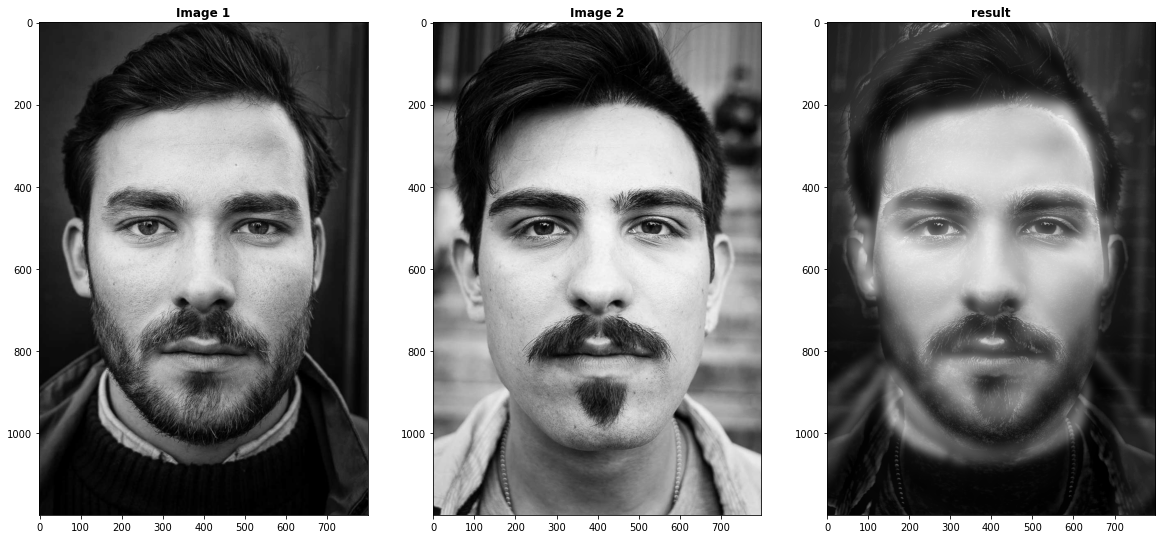

In [10]:
I = cv2.imread('data/0a_face.PNG', cv2.IMREAD_GRAYSCALE)
J = cv2.imread('data/0b_face.PNG', cv2.IMREAD_GRAYSCALE)

HW4_hybrid(I, J, 10, 10)

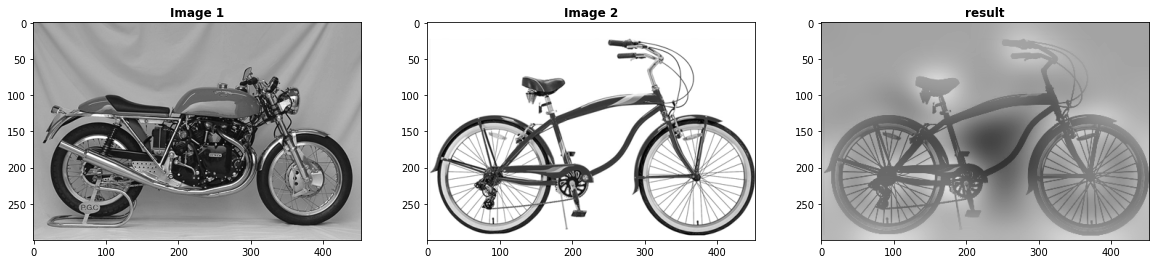

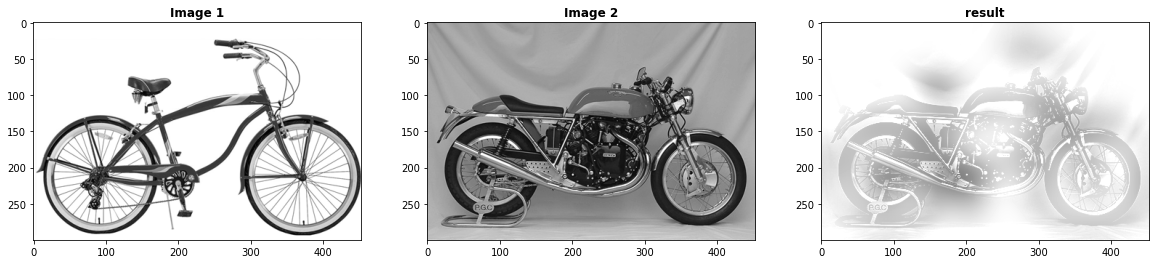

In [11]:
I = cv2.imread('data/2a_motorcycle.bmp', cv2.IMREAD_GRAYSCALE)
J = cv2.imread('data/2b_bicycle.bmp', cv2.IMREAD_GRAYSCALE)

HW4_hybrid(I, J, 20, 20)
HW4_hybrid(J, I, 20, 20)

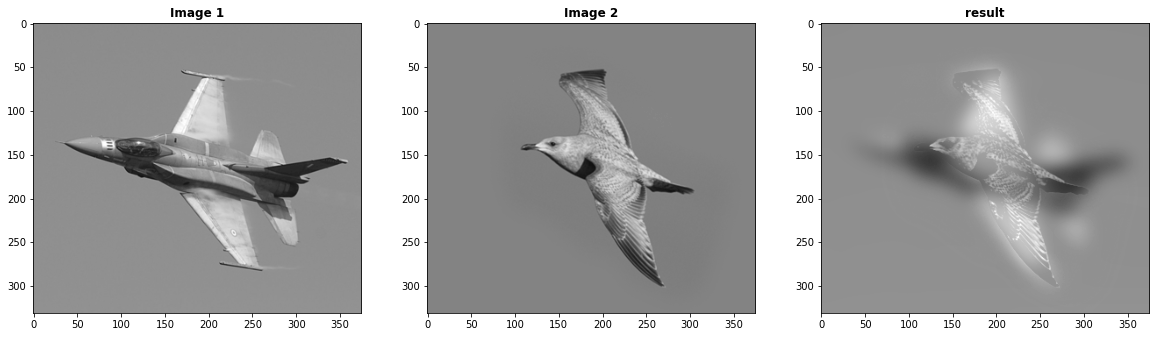

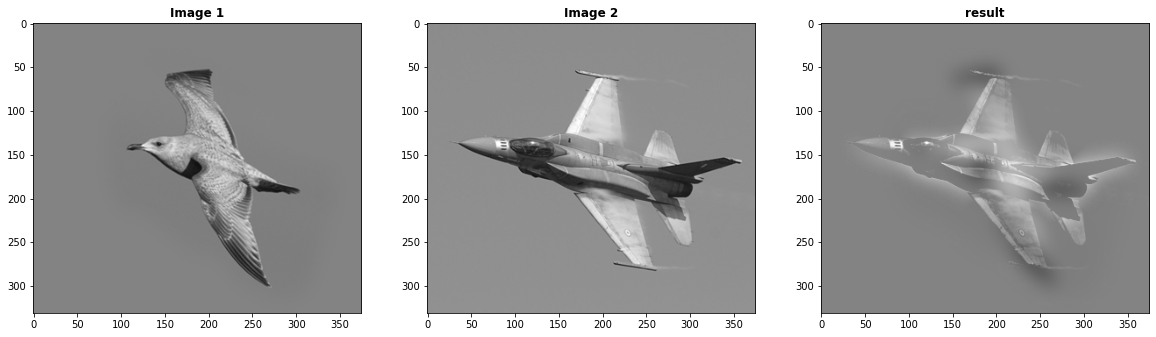

In [12]:
I = cv2.imread('data/3a_plane.bmp', cv2.IMREAD_GRAYSCALE)
J = cv2.imread('data/3b_bird.bmp', cv2.IMREAD_GRAYSCALE)

HW4_hybrid(I, J, 10, 10)
HW4_hybrid(J, I, 10, 10)

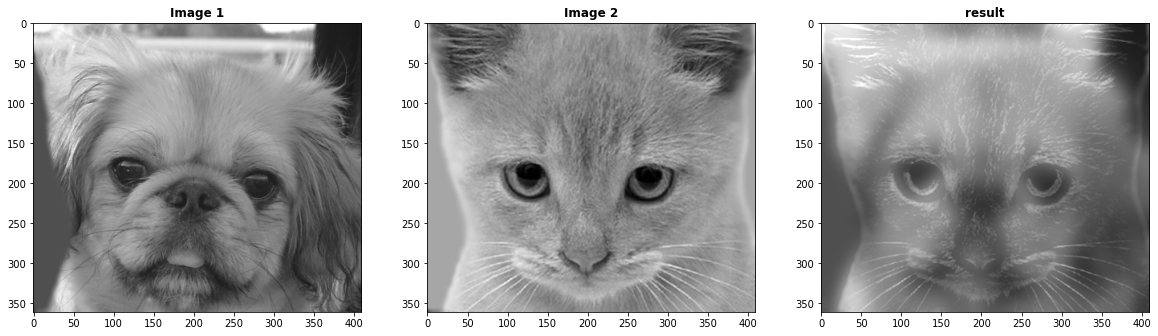

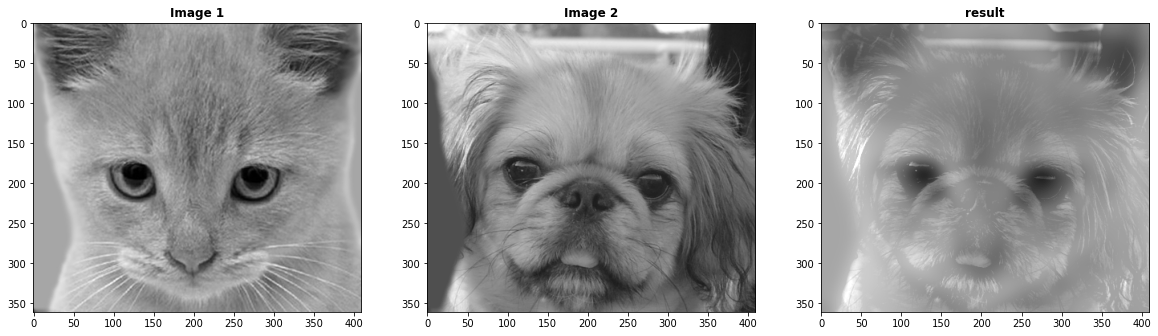

In [13]:
I = cv2.imread('data/1a_dog.bmp', cv2.IMREAD_GRAYSCALE)
J = cv2.imread('data/1b_cat.bmp', cv2.IMREAD_GRAYSCALE)

HW4_hybrid(I, J, 10, 10)
HW4_hybrid(J, I, 10, 10)

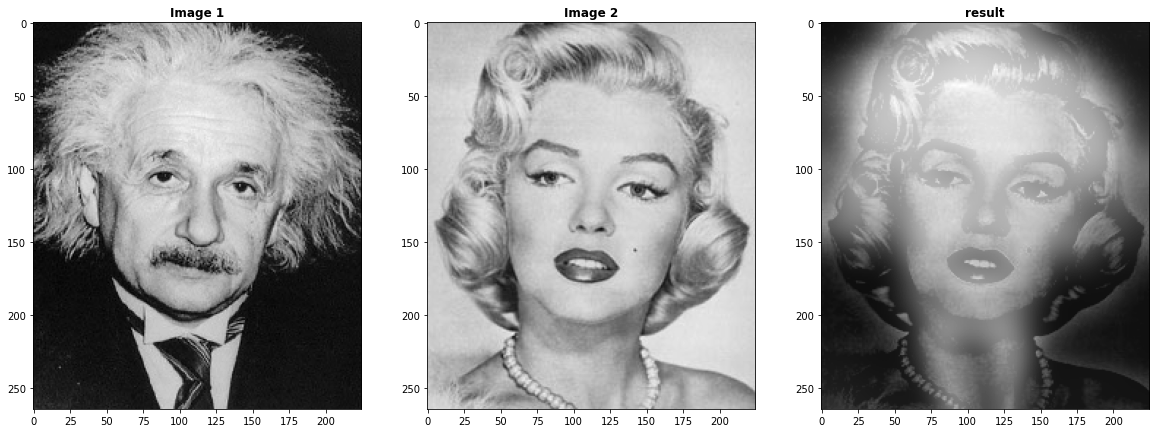

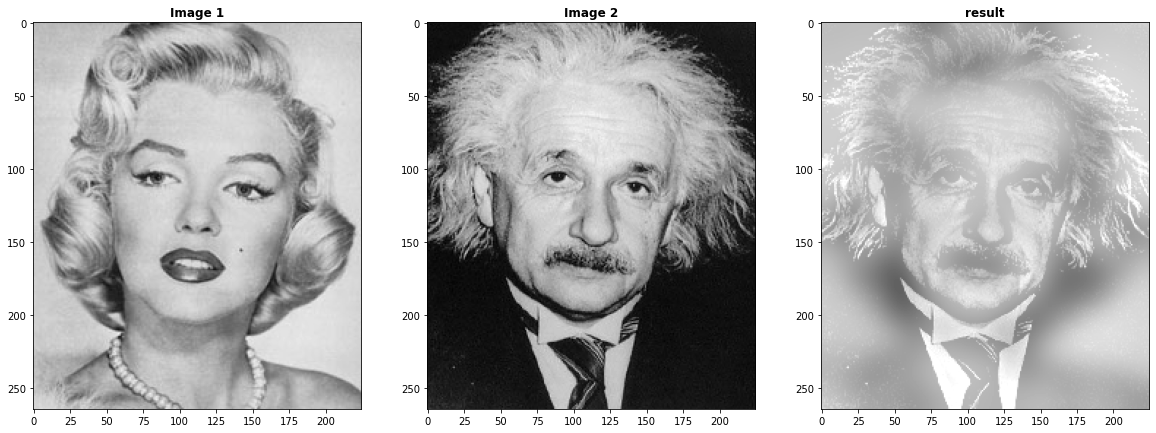

In [14]:
I = cv2.imread('data/4a_einstein.bmp', cv2.IMREAD_GRAYSCALE)
J = cv2.imread('data/4b_marilyn.bmp', cv2.IMREAD_GRAYSCALE)

HW4_hybrid(I, J, 10, 10)
HW4_hybrid(J, I, 10, 10)

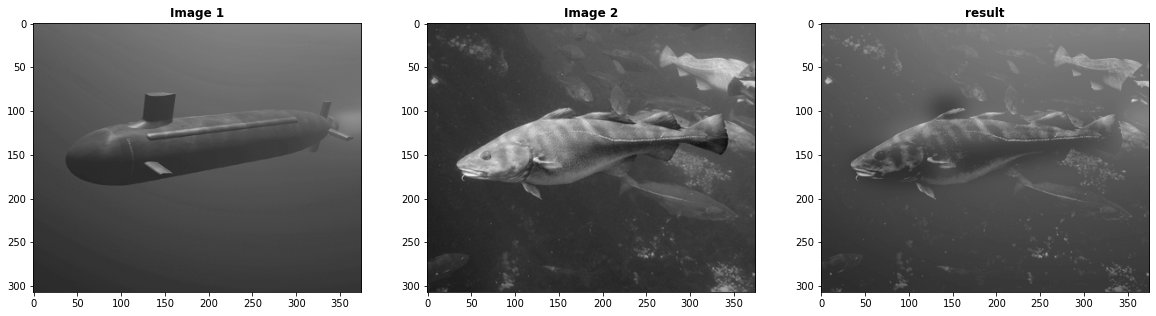

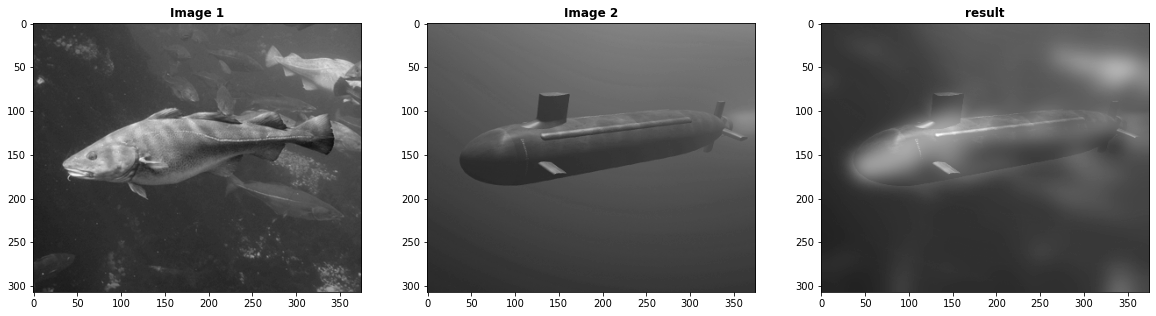

In [15]:
I = cv2.imread('data/5a_submarine.bmp', cv2.IMREAD_GRAYSCALE)
J = cv2.imread('data/5b_fish.bmp', cv2.IMREAD_GRAYSCALE)

HW4_hybrid(I, J, 10, 10)
HW4_hybrid(J, I, 10, 10)

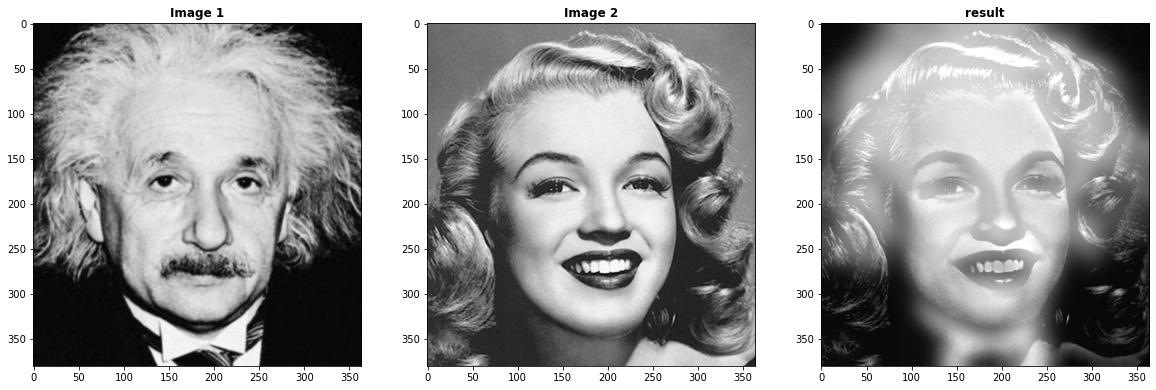

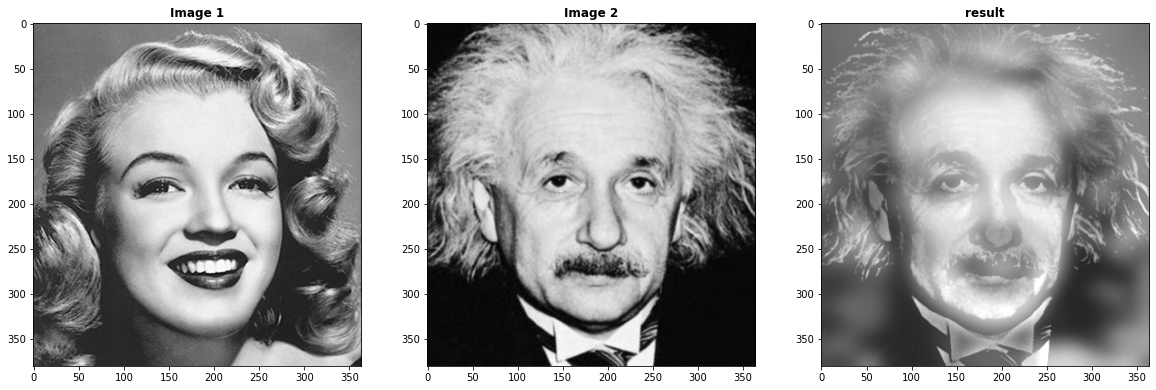

In [16]:
I = cv2.imread('data/6a_einstein.png', cv2.IMREAD_GRAYSCALE)
J = cv2.imread('data/6b_marilyn.png', cv2.IMREAD_GRAYSCALE)

HW4_hybrid(I, J, 10, 10)
HW4_hybrid(J, I, 10, 10)